In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import sklearn as sk

In [14]:
data = pd.read_csv("austin_weather.csv")

In [5]:
features = ['tempmax', 'tempmin', 'humidity', 'dew']
target = 'precip'
data = data.dropna(subset=features + [target])

In [6]:
X = data[features]
y = data[target]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

Mean Squared Error: 0.04974770851826499
Root Mean Squared Error: 0.22304194340586478
R-squared: 0.1661984442789477


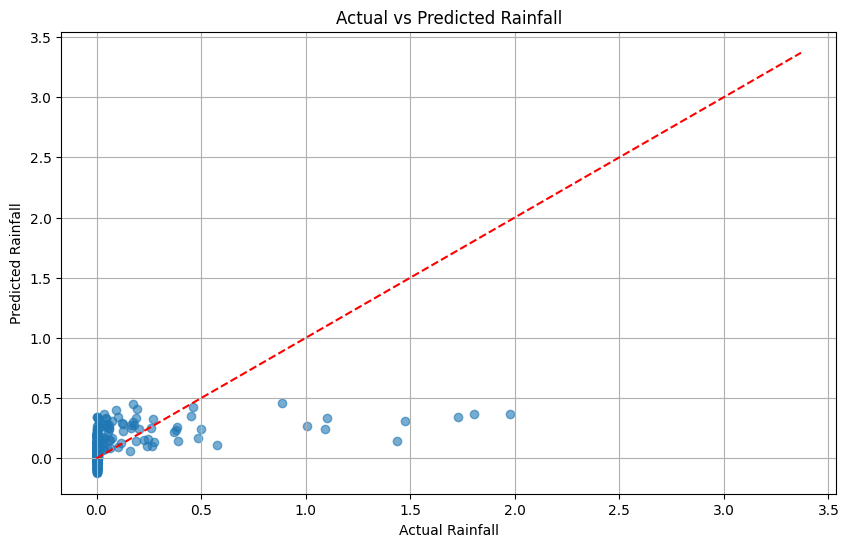

In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.grid()
plt.show()



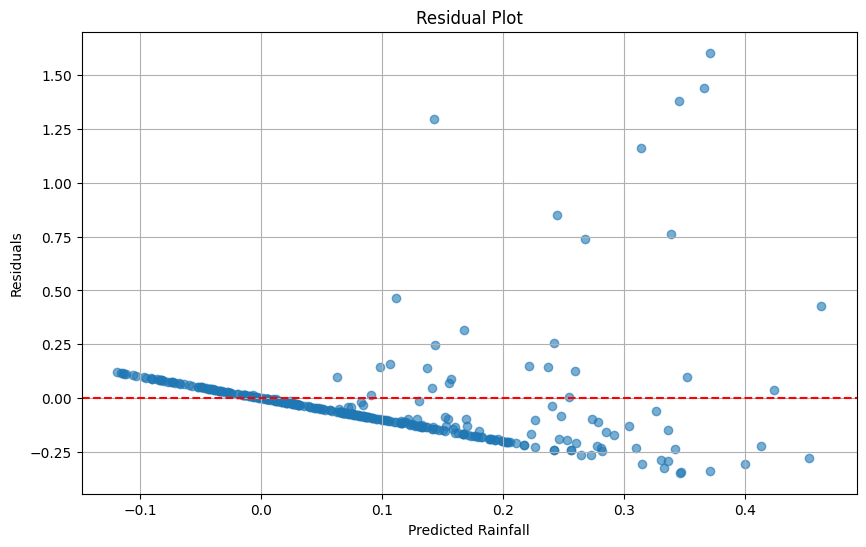

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.grid()
plt.show()

In [10]:
data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Austin,1/1/19,45.1,39.4,42.6,43.6,34.8,38.2,36.6,79.6,...,4.0,2,NaN,2019-01-01T07:27:35,2019-01-01T17:41:36,0.85,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
1,Austin,1/2/19,40.3,36.2,37.7,34.4,29.1,31.9,35.1,90.2,...,0.7,0,NaN,2019-01-02T07:27:48,2019-01-02T17:42:19,0.88,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
2,Austin,1/3/19,51.8,34.7,40.9,51.8,31.0,37.6,35.6,82.6,...,7.6,5,NaN,2019-01-03T07:28:00,2019-01-03T17:43:03,0.92,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
3,Austin,1/4/19,65.9,32.5,46.2,65.9,29.1,45.1,32.9,64.8,...,12.4,6,NaN,2019-01-04T07:28:10,2019-01-04T17:43:48,0.95,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
4,Austin,1/5/19,73.7,37.5,52.3,73.7,36.2,52.2,35.5,58.6,...,12.7,6,NaN,2019-01-05T07:28:19,2019-01-05T17:44:34,0.00,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."


In [11]:
data=data.replace('T', 0.0)

In [12]:
data=data.replace('T', 0.0)
data=data.replace('-', 0.0)
data.to_csv('austin_final.csv')

Data types of features (x) before model fitting:
Unnamed: 0            int64
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precipprob            int64
precipcover         float64
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
moonphase           float64
dtype: object
The precipitation in inches for the input is: [[-0.029085]]
the precipitation trend graph: 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


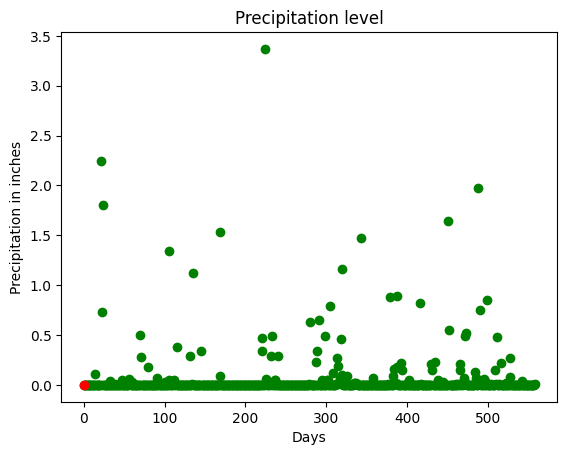

Precipitation vs selected attributes graph: 


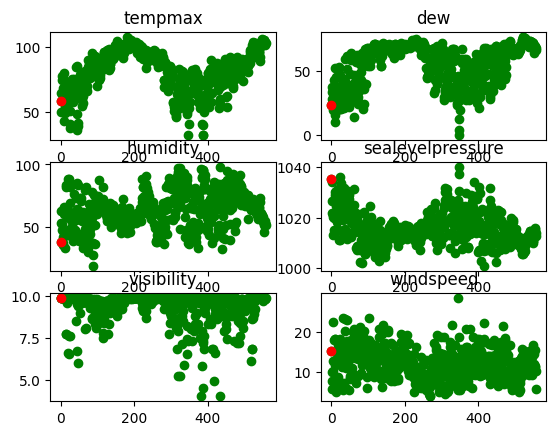

In [13]:
data=pd.read_csv('austin_final.csv')

# Drop non-numeric columns that are not needed for the model
x = data.drop(['precip', 'name', 'datetime', 'conditions', 'description', 'icon', 'stations', 'preciptype', 'sunrise', 'sunset'], axis=1)

# Drop rows with any NaN values in the features
x = x.dropna()

# Output or the label
Y=data['precip']

# Reshape Y after dropping rows from x to ensure alignment
# Find the indices of the rows that were kept in x
kept_indices = x.index

# Filter Y using these indices to keep only the corresponding rows
Y = Y.loc[kept_indices]


# reshaping it into a 2-d vector
Y = Y.values.reshape(-1,1)

# Add a check for data types before fitting the model
print("Data types of features (x) before model fitting:")
print(x.dtypes)

#consider a random day in the dataset
# day_index=798 # The original day_index might be dropped, so we need to select from the new indices
# Let's select a day_index from the available indices in the cleaned data
if kept_indices.size > 0:
  day_index = kept_indices[0] # Use the first available index for example
else:
  print("No data remaining after dropping NaNs. Cannot perform prediction or plotting.")
  # Exit or handle the case where no data is left
  exit()


days = [i for i in range(Y.size)]


# initialize a linear regression classifier
clf = LinearRegression()

# train the classifier with our
# input data.
clf.fit(x, Y)

# give a sample input to test our model
# this is a 2-D vector that contains values
# for each column in the dataset
# NOTE: The input array needs to match the number of features after dropping columns.
# Let's inspect the columns of x to create a correct sample input.
# print(x.columns)
# Based on x.columns (excluding 'precip'), the input array should have 26 features.
# The current input array has 17 features. This will cause an error.
# A more robust approach would be to use a sample row from the preprocessed dataframe.

# Example using a sample row from the dataframe for prediction
# Select a row from the original dataframe, drop non-numeric and 'precip' columns
# We need to ensure the selected row is also in the cleaned data (x)
if day_index in data.index:
  sample_input_row = data.loc[day_index].drop(['precip', 'name', 'datetime', 'conditions', 'description', 'icon', 'stations', 'preciptype', 'sunrise', 'sunset']).values.reshape(1, -1)
  #print the output.
  print('The precipitation in inches for the input is:', clf.predict(sample_input_row))
else:
  print(f"Original day_index {day_index} was dropped due to missing values. Cannot perform prediction with original index.")



#plot a graph of the precipitation levels
# versus the total number of days.
#one day, which is in red, is
#tracked here. It has a precipitation
# of approx. 2 inches.
print("the precipitation trend graph: ")
plt.scatter(days, Y, color='g')
# Find the position of the selected day_index in the kept_indices
try:
    day_position = kept_indices.get_loc(day_index)
    plt.scatter(days[day_position], Y[day_position], color='r')
except KeyError:
    print(f"Selected day_index {day_index} not found in the filtered data indices for plotting.")


plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")

plt.show()
x_vis =x.filter(['tempmax', 'dew', 'humidity', 'sealevelpressure',
                 'visibility', 'windspeed'], axis=1)


# plot a graph with a few features (x values)
# against the precipitation or rainfall to observe
#the trends

print("Precipitation vs selected attributes graph: ")

for i in range(x_vis.columns.size):
  plt.subplot(3, 2, i + 1)
  plt.scatter(days, x_vis[x_vis.columns.values[i]], color='g')

  # Find the position of the selected day_index in the kept_indices for x_vis
  try:
    day_position_vis = kept_indices.get_loc(day_index)
    plt.scatter(days[day_position_vis],
                x_vis.iloc[day_position_vis, i], color='r') # Use iloc for positional indexing
  except KeyError:
     print(f"Selected day_index {day_index} not found in x_vis indices for plotting.")

  plt.title(x_vis.columns.values[i])

plt.show()